In [12]:
#加载所需要的包
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

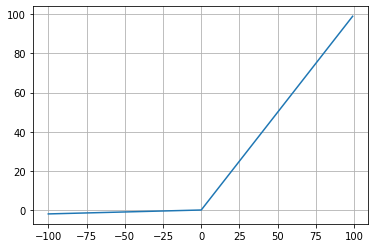

In [19]:
x1=np.arange(-100,0)
x2=np.arange(0,100)
y1=0.02*x1
x = np.concatenate([x1,x2],0)
y = np.concatenate([y1,x2],0)
plt.plot(x,y)
plt.title('LeakyRelu(0.02)')
plt.grid()
plt.show()

train矩阵大小： (1600,) 最大值： 8.465321 最小值： -0.38960692 平均值： 0.0058200695 25%,50%,75%,90%,99%,99.9%分位数： [-0.37665978 -0.34521669 -0.18100749  0.73066856  4.7658754   8.0137156 ] 
 1.0075359


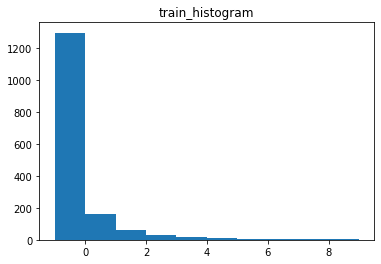

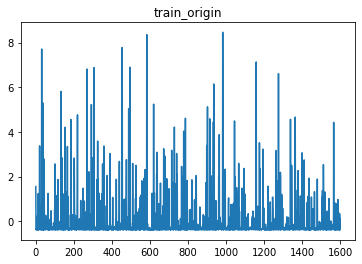

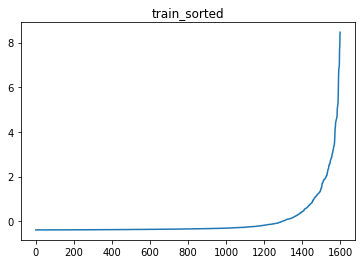

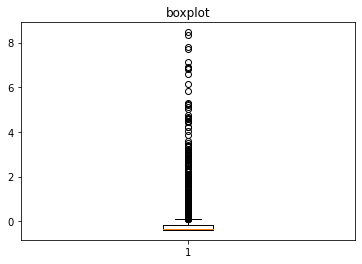

aural矩阵大小： (2000, 128) 最大值： 36.356274 最小值 -26.410019 平均值： 0.0011494581 



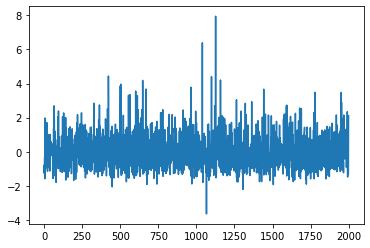

social矩阵大小： (2000, 3) 最大值： 33.614864 最小值 -0.60633117 平均值： 0.170987 



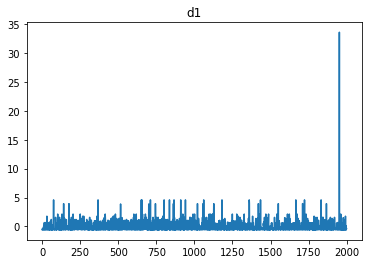

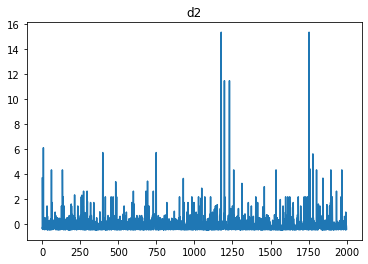

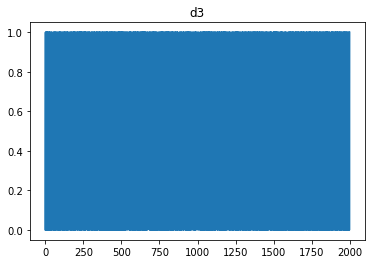

textual矩阵大小： (2000, 20) 最大值： 6.4149795 最小值 -0.33763078 平均值： 7.742643e-09 



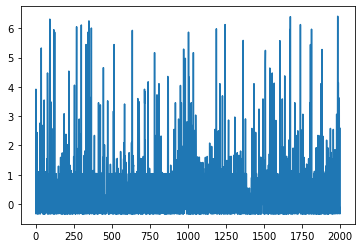

visual矩阵大小： (2000, 128) 最大值： 12.780909 最小值 -9.1255455 平均值： 0.0032517768 



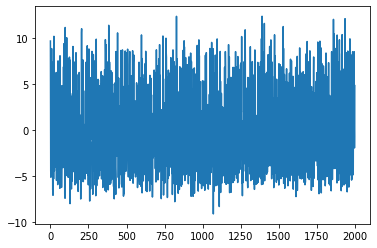

In [14]:
#查看数据的特征
aural = np.load(r'data/mod_aural.npy')
social = np.load(r'data/mod_social.npy')
textual = np.load(r'data/mod_textual.npy')
visual = np.load(r'data/mod_visual.npy')
train = np.load(r'data/train.npy')
print("train矩阵大小：",train.shape,'最大值：',np.max(train),'最小值：',np.min(train),'平均值：',np.average(train),'25%,50%,75%,90%,99%,99.9%分位数：',np.percentile(train, [25, 50, 75,90,99,99.9]),'\n',np.std(train))
plt.hist(train, bins =  [-1,0,1,2,3,4,5,6,7,8,9]) 
plt.title("train_histogram") 
plt.show()

x = np.arange(0,train.shape[0])
y = train[x]
plt.title('train_origin')
plt.plot(x,y)
plt.show()
x = np.arange(0,train.shape[0])
y = np.sort(train[x])
plt.title('train_sorted')
plt.plot(x,y)
plt.show()
plt.title('boxplot')
plt.boxplot(train)
plt.show()
print("aural矩阵大小：",aural.shape,'最大值：',np.max(aural),'最小值',np.min(aural),'平均值：',np.average(aural),'\n')
x = np.arange(0,aural.shape[0])
y = aural[:,0]
plt.plot(x,y)
plt.show()
print("social矩阵大小：",social.shape,'最大值：',np.max(social),'最小值',np.min(social),'平均值：',np.average(social),'\n')
x = np.arange(0,social.shape[0])
y = social[:,0]
plt.title('d1')
plt.plot(x,y)
plt.show()
y = social[:,1]
plt.title('d2')
plt.plot(x,y)
plt.show()
y = social[:,2]
plt.title('d3')
plt.plot(x,y)
plt.show()
print("textual矩阵大小：",textual.shape,'最大值：',np.max(textual),'最小值',np.min(textual),'平均值：',np.average(textual),'\n')
x = np.arange(0,textual.shape[0])
y = textual[:,0]
plt.plot(x,y)
plt.show()
print("visual矩阵大小：",visual.shape,'最大值：',np.max(visual),'最小值',np.min(visual),'平均值：',np.average(visual),'\n')
x = np.arange(0,visual.shape[0])
y = visual[:,0]
plt.plot(x,y)
plt.show()

In [15]:
# 试探性地针对textual做一次简单的梯度下降深度神经网络
# train(1600,)是真实值
# textual(2000, 20)前1600个样本作为x0输入,m = 1600,n0=20
# 所以参数有w1 w2 … wL, b1 b2 … bL
# 超参有层数layer_dims、学习率learning_rate和迭代次数iterate
# 除了最后一层是g(x)是sigmoid，g(x)为ReLU
def relu(x):
    return np.maximum(x,0),x

def sigmoid(x):
    return 1/(1+np.exp(-x)),x

def initialize_parameters_deep(layer_dims):
    '''
    初始化参数
    arg:
    layer_dims--每层的维度的列表

    ret:
    parameters--w1,w2,...,wL,b1,b2,...,bL的字典

    '''
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)

    for l in range(1,L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))

        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
    
    return parameters

def linear_forward(A, W, b):
    '''
    向前传播
    '''
    Z = np.dot(W,A)+b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

def linear_activation_forward(A_prev, W, b, activation):
    """
    激活函数
    """
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

def L_model_forward(X, parameters):
    '''
    向前的模型
    '''
    caches = []
    A = X
    L = len(parameters) // 2  

    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], "relu")
        caches.append(cache)

    AL, cache =  linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], "sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

def compute_cost(AL, Y):

    m = Y.size

    cost = (-1/m)*np.sum(np.multiply(Y,np.log(AL))+np.multiply(1-Y,np.log(1-AL)))
    
    cost = np.squeeze(cost)     
    assert(cost.shape == ())
    
    return cost

def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = (1/m)*np.dot(dZ,A_prev.T)
    db = (1/m)*np.sum(dZ,axis = 1, keepdims= True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db
def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) 
    
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")

    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp =  linear_activation_backward(grads["dA"+str(l+1)], current_cache, "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads 
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2 
  
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*grads["db" + str(l+1)]
    return parameters

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    np.random.seed(1)
    costs = []                        
    
    parameters = initialize_parameters_deep(layers_dims)

    for i in range(0, num_iterations):


        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads =  L_model_backward(AL, Y, caches)

        parameters = update_parameters(parameters, grads, learning_rate)
                
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters   

In [16]:
maxT = np.max(train)
minT = np.min(train)
trainT = (train - minT)/(maxT-minT)
layers_dims = [20, 15, 7, 5, 1] #  4-layer model
parameters = L_layer_model(textual[0:1600,:].T, train, layers_dims, num_iterations = 2500, print_cost = True)

NameError: name 'sigmoid_backward' is not defined

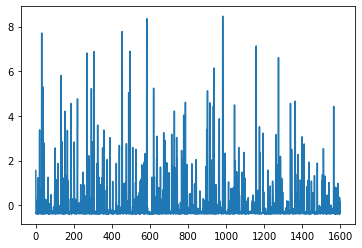

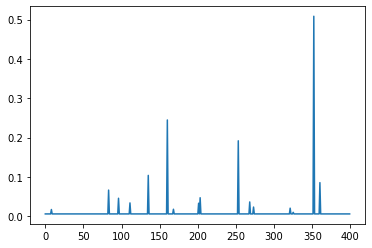

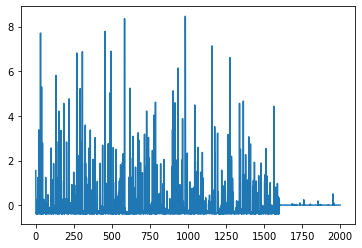

In [10]:
train = np.load(r'data/train.npy')
x = range(train.shape[0])
y = train[x]
plt.plot(x,y)
plt.show()
prediction = np.load(r'prediction.npy')
x = range(prediction.shape[0])
y = prediction[x]
plt.plot(x,y)
plt.show()
total = np.concatenate([train,prediction.flatten()])
x = range(total.shape[0])
y = total[x]
plt.plot(x,y)
plt.show()